<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#273746; border:1; color: white;' role="tab" aria-controls="home"><center>Análisis de Segmentación de Clientes de la Empresa Oxford - Perú</center></h1>

<left>**Fecha: 13-12-2024**</left>


# <font color="#ba4a00"><strong>Análisis de Segmentación de Clientes en comercio electrónico - RETAIL</font>
<hr color="#F5F5F5" size="1">

<img align="right" width="240" height="240" src="https://montenbaik.com/wp-content/uploads/2011/09/logo-MTBAik-ENDURO-2011-ox-03.jpg">

En este notebook se ha realizado el trabajo de segmentación de clientes, desde Enero 2015 hasta Enero 2018 para la tienda **[Oxford Perú](https://www.oxfordstore.pe/)** para realizar un análisis descriptivo del comportamiento de sus clientes y poder proyectarlos hasta la actualidad, es preciso mencionar que los datos fueron brindados de manera no oficial (personal de amistad).

**Elaborado Por: [Econ. Mag. Enrique F. Gutierrez Rivasplata](https://github.com/EnriqueGRivas/Analisis_Bluex/tree/main/PP1)**


## <img align="left"  width="240" height="120" src="https://www.solusoft.es/Info/Imagenes/logo_proyecta.png"> 

<hr color="#F5F5F5" size="2"> 


El Análisis del **[Proyecto Bluex](https://github.com/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/4_Segmentaci%C3%B3n_de_Clientes_Parte_2.ipynb)** se hizo pensando en el proyecto realizado para la empresa **[Blue Express Perú](https://www.blue.cl/home/)** en un estudio de segmentación de clientes mediante el análisis de RFM. El propósito de este proyecto es análizar que tanto las transacciones del e-commerce es competitiva frente a otros canales de ventas, abriendo oportunidades para futuros mayoristas.

<div style="display:inline-block;vertical-align:top;">
<h2>Contenido:</h2>
<ul>
    <li><a href="#contexto-proyecto">Acerca del contexto del Proyecto</a></li>
    <li><a href="#descripcion-variables">Descripción de las variables del conjunto de datos (Dataset)</a></li>
     <li><a href="#importar-dataset">Importar Dataset</a></li>
    <li><a href="#limpiar-dataset">Comprender y limpiar el Dataset</a></li>
     <li><a href="#analisis-metricas">Análisis de métricas de ventas</a></li>
     <li><a href="#analisis-cohorte">Análisis de Cohorte</a></li>
    <li><a href="#segmentacion">Segmentación de clientes mediante RFM</a></li>
     <li><a href="#recomendaciones">Recomendaciones para productos de Lima</a></li>
     <li><a href="#referencias">Referencias</a></li>
</ul>
</div>

<a id='contexto-proyecto'></a>
# <font color="#ba4a00"><strong>Acerca del contexto del Proyecto</font>
<hr color="#F5F5F5" size="1">

### Realizar segmentación de clientes mediante la metodología RFM para comercio electrónico.

En este proyecto se debe realizar un análisis descriptivo que mostrará al gerente general de la empresa <strong>Oxford-Perú</strong>, una tienda minorista con sede en Lima, qué tan bien o mal van las ventas en su empresa.

- Oxford es una marca reconocida a nivel nacional por su amplia gama de bicicletas diseñadas para satisfacer las necesidades de diversos ciclistas. Con presencia en el mercado peruano, Oxford se ha posicionado como una excelente opción para quienes buscan una bicicleta de calidad, diseño atractivo y durabilidad. 
- Oxford ha estado presente en Perú por más de 10 años, ofreciendo sus productos y servicios a los amantes del ciclismo. 
- Una de las claves de su éxito fue la adquisición de la marca peruana Goliat, una marca tradicional con un gran reconocimiento en el mercado local. Esta adquisición les permitió fortalecer su posición y llegar a un público más amplio. 
- A lo largo de estos años, Oxford ha experimentado un crecimiento constante, ampliando su red de distribución y diversificando su oferta de productos.

Para este análisis debemos medir la participación del cliente basándose en un <mark><b>análisis de cohorte</b></mark> y realizar una <mark><b>Segmentación de clientes aplicando la metodología RFM</b></mark>, para que el negocio pueda enfocar sus esfuerzos y adoptar diferentes estrategias para cada segmento, además de realizar una limpieza y procesamiento de datos previo a esto.

<div class="alert alert-info"> 
<strong><div style="color: 0gb00,00, 0);">📌 Los principales objetivos de aprendizaje de este proyecto: </div></strong> <br>
<div style="color: 0gb00,00, 0);">→ Realizar limpieza y procesamiento de datos.</div>
<div style="color: 0gb00,00, 0);">→ Realizar un análisis de Cohorte.</div>
<div style="color: 0gb00,00, 0);">→ Realizar la segmentación de clientes utilizando el modelo RFM y</div>
<div style="color: 0gb00,00, 0);">→ Desarrollar Visualizaciones.</div>
</div>

<a id='descripcion-variables'></a>
# <font color="#ba4a00"><strong>Descripción de las variables del Dataset</font>
<hr color="#F5F5F5" size="1">

| Variables | Descripción |
| --- | --- |
| **Orden_Servicio (OS)** | Un número asignado de forma única a cada transacción. |
| **Fecha** | Fecha de la factura u OS, día en que se generó la transacción. |
| **Cod_Cliente** | Número de clientes. Un número completo de 7 dígitos alfa numerico, asignado exclusivamente a cada cliente.|
| **Distrito_cliente** | El nombre del distrito donde reside cada cliente.|
| **Cantidad** | Las cantidades de cada producto (artículo) por transacción enviadas. |
| **Ingreso_Total** | Valor de la factura expresada en soles. |

<a id='otros-analisis'></a>
## <font color="#ba4a00"><strong>Otros análisis relevantes para el dataset </font>
<hr color="#F5F5F5" size="1"> 

- Importe total de ventas por mes.

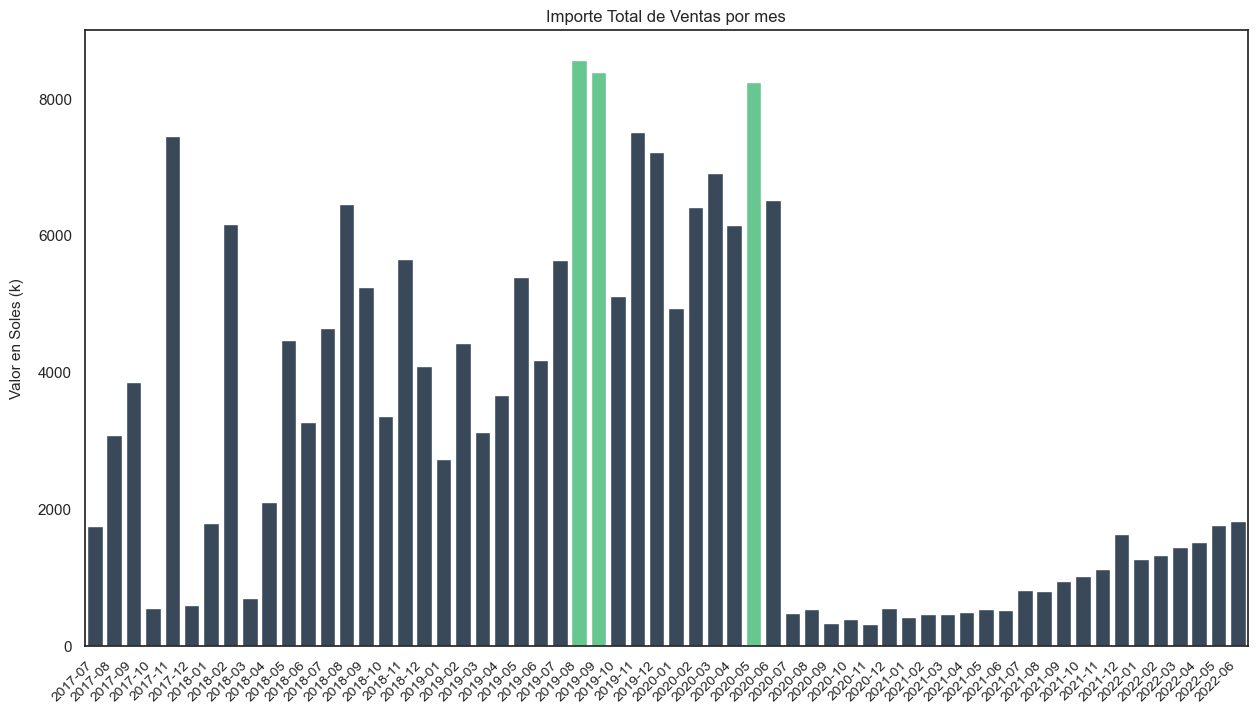

In [65]:
# Calculando las ventas totales por mes
# ==============================================================================

df_importe_mes = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                               ['Ingreso_total'].sum()).reset_index()
df_importe_mes.columns = ['Year_mes', 'Importe Total de Ventas']

# Transformando el valor en un múltiplo de 1.000 o K.
df_importe_mes['Importe Total de Ventas (K)'] = (df_importe_mes['Importe Total de Ventas']
                                                   /1000).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_importe_mes['Year_mes'] = df_importe_mes['Year_mes'].astype(str)

# Seleccionando el valor mínimo de los 3 mayores importes de ventas totales
minimo = min(df_importe_mes['Importe Total de Ventas (K)'].nlargest(n=3))

# Colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde 
        for x in df_importe_mes['Importe Total de Ventas (K)']]

# Creando el gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Year_mes",
                 y="Importe Total de Ventas (K)",
                 data=df_importe_mes,
                 ci=False,
                 palette=clrs)

ax.set_title('Importe Total de Ventas por mes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Valor en Soles (k)', fontsize=11, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

Podemos ver que los meses de _agosto_ y _setiembre de 2019_ y _mayo de 2020_ tuvieron el importe total más alto, con los montos S/8574.49K, S/8388.83K y S/8248.45K, respectivamente.

- Cantidad de ventas dentro y fuera de Lima, por mes.

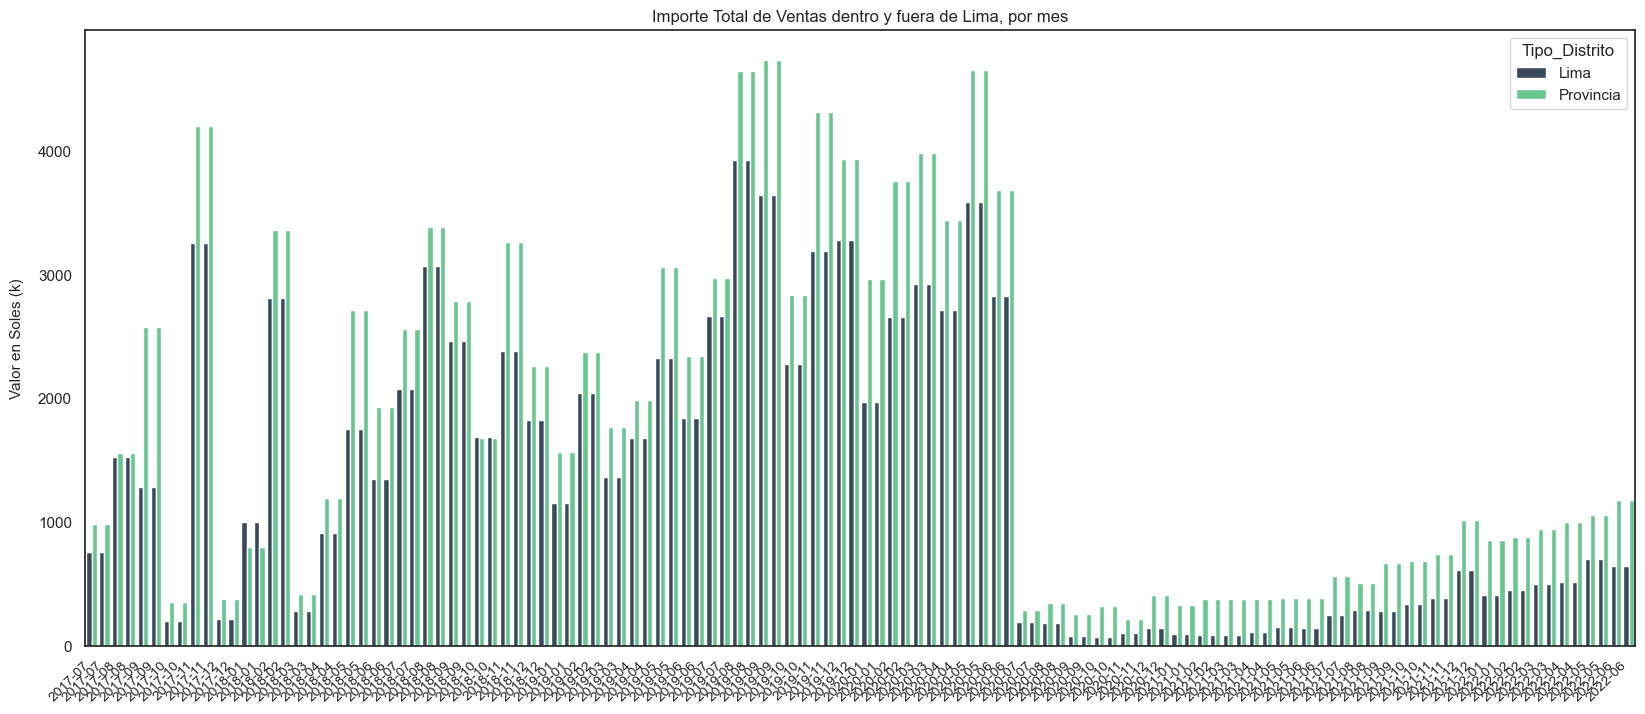

In [67]:
# Grafico
# ==============================================================================
df_mes= pd.DataFrame(ecommerce.groupby(by=['Year_mes',
                                    'Tipo_Distrito'])['Ingreso_total'].sum()).reset_index()
df_mes.columns = ['Year_mes','Tipo_Distrito', 'Importe Total de Ventas']

# Transformando el valor en un múltiplo de 1.000 o K.
df_mes['Importe Total de Ventas (K)'] = (df_mes['Importe Total de Ventas']/1000).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a una cadena que se utilizará en el gráfico que se generará
df_mes['Year_mes'] = df_mes['Year_mes'].astype(str)


sns.set_theme(style="white", palette=[gris, verde])
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Year_mes",
                 y="Importe Total de Ventas (K)",
                 data=df_mes,
                 order=df_mes['Year_mes'],
                 hue='Tipo_Distrito',
                 ci=False)

ax.set_title('Importe Total de Ventas dentro y fuera de Lima, por mes')
ax.set_xlabel('', fontsize=11, labelpad=10)
ax.set_ylabel('Valor en Soles (k)', fontsize=11, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

Si observamos el gráfico de barras, es posible ver que hay una minima diferencia en las cantidades de ventas en Lima, que son mayores que las ventas fuera de Lima (Provincias).

- Los 10 mayores clientes que realizaron más compras dentro y fuera de Lima, en el mismo mes.

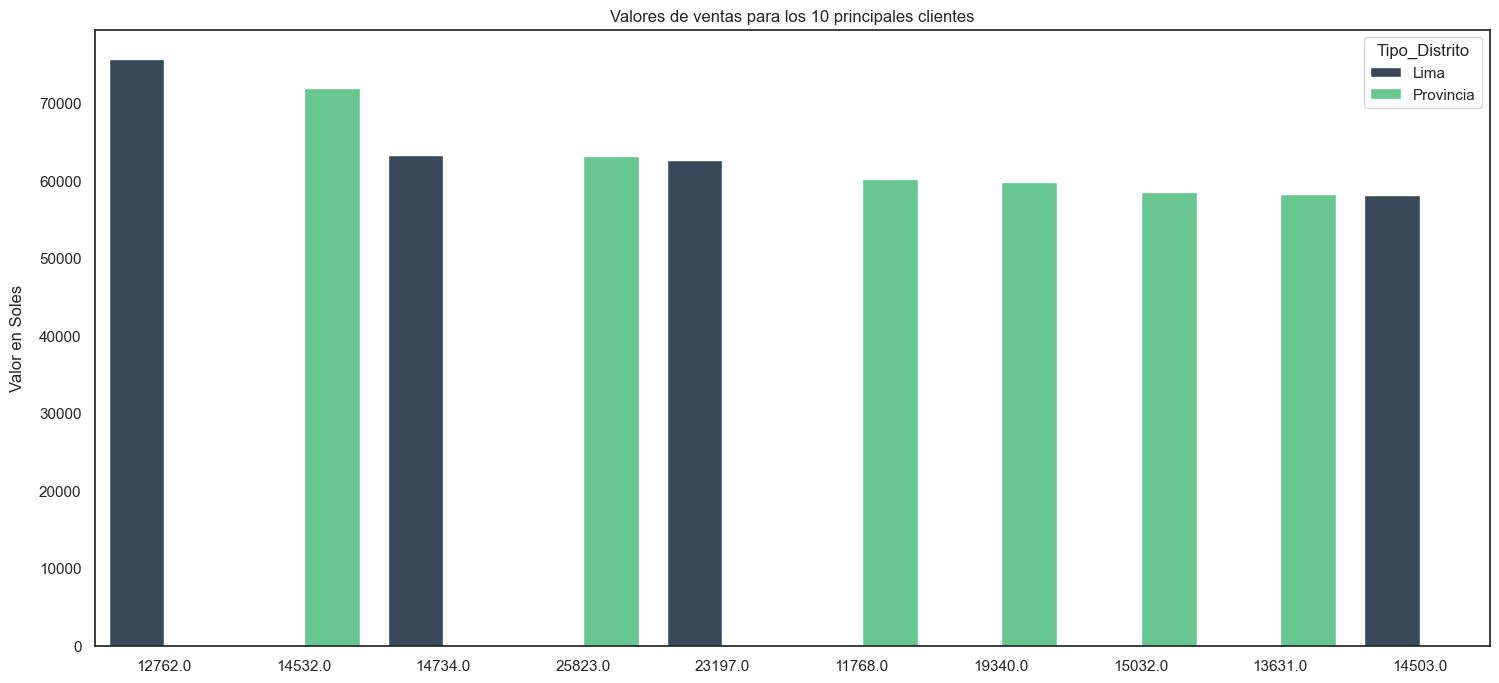

In [71]:
# Calculando los 10 clientes principales y determinar si son o no de Lima.
# ==============================================================================
df_cliente_mes= pd.DataFrame(ecommerce.groupby(by=['Cod_Cliente',
                                                      'Tipo_Distrito'])
                             ['Ingreso_total'].sum()).reset_index()
df_cliente_mes.columns = ['Cliente', 'Tipo_Distrito', 'Importe Total de Ventas']
df_cliente_mes.sort_values('Importe Total de Ventas', ascending=False, inplace=True)
df_cliente_mes = df_cliente_mes.head(10)

# visualizacion
sns.set_theme(style="white", palette=[gris, verde])
plt.figure(figsize = (18,8))
ax = sns.barplot(x="Cliente",
                 y="Importe Total de Ventas",
                 data=df_cliente_mes,
                 hue='Tipo_Distrito',
                 order=df_cliente_mes['Cliente'],
                 ci=False)
ax.set_title('Valores de ventas para los 10 principales clientes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Valor en Soles', fontsize=12, labelpad=10)


# Agregar marcadores de texto a las barras
#for p in ax.patches:
    #ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            #'{:.0f}'.format(p.get_height()), ha='center', va='bottom')

plt.show()

- Cantidad mensual de productos vendidos.

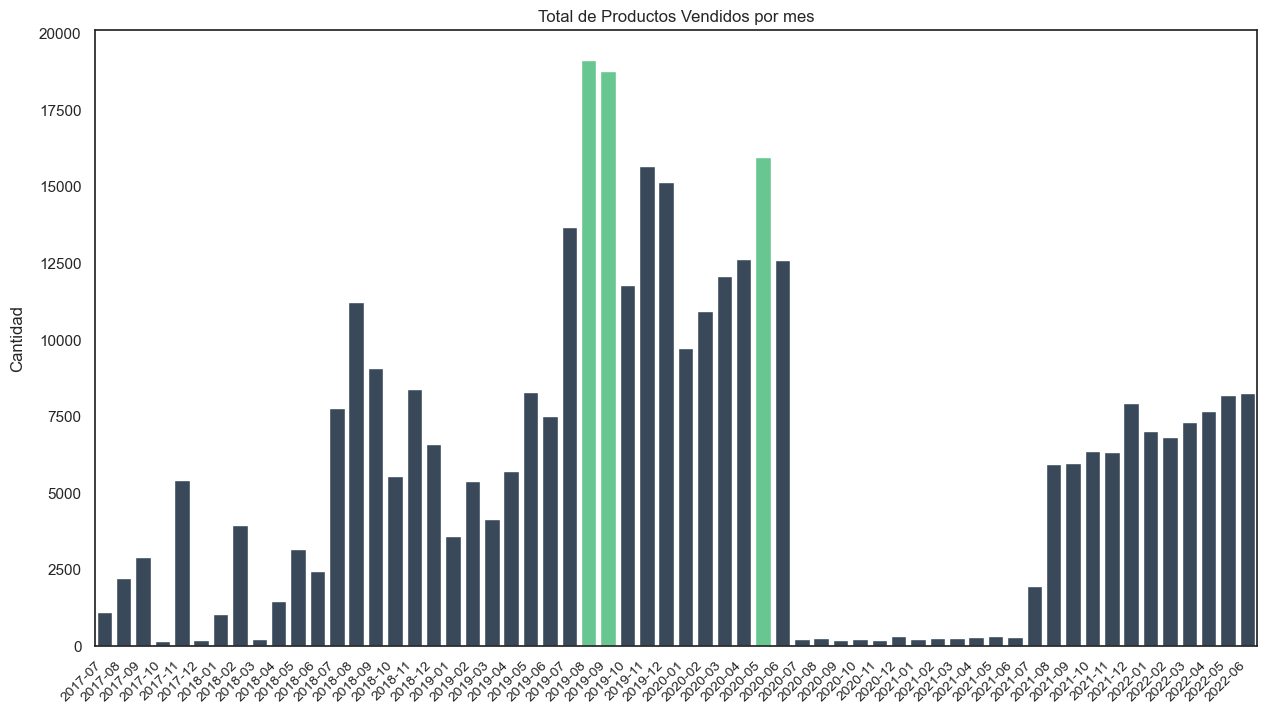

In [73]:
# Calcular la cantidad mensual de productos vendidos.
# ==============================================================================
df_productos = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                           ['Cantidad'].sum()).reset_index()
df_productos.columns = ['Year_mes', 'Cantidad de Productos Vendidos']

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_productos['Year_mes'] = df_productos['Year_mes'].astype(str)

# Seleccionando el valor mínimo de los 3 mayores montos de ventas totales
minimo = min(df_productos['Cantidad de Productos Vendidos'].nlargest(n=3))

# colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde 
        for x in df_productos['Cantidad de Productos Vendidos']]

# Grafico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Year_mes",
                 y="Cantidad de Productos Vendidos",
                 data=df_productos,
                 ci=False,
                 palette=clrs)

ax.set_title('Total de Productos Vendidos por mes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Cantidad', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

- **OS Promedio del Período.**

In [75]:
# Ordenes de servicio promedio por periodo
# ==============================================================================
os = (ecommerce['Ingreso_total'].sum() / 
          ecommerce['Cod_Cliente'].count()).round(2)
os

1081.15

La OS promedio cuesta **S/1081.15**.

- **OS promedio mensual:**

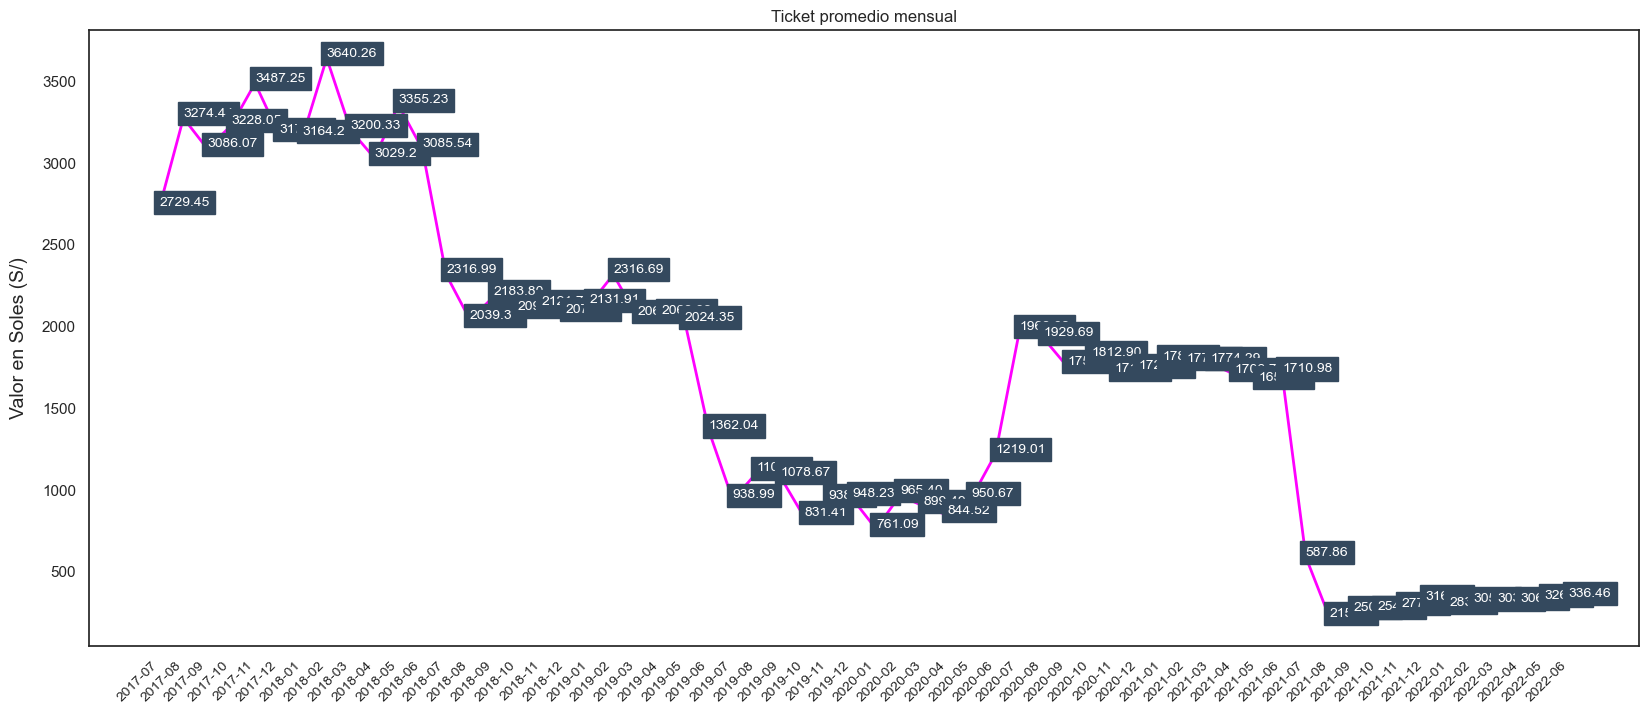

In [77]:
# Calcular el valor de ventas mensual
# ==============================================================================
ticket = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                      ['Ingreso_total'].sum()).reset_index()

# Calcular el número de clientes mensuales.
ticket2 = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                       ['Cod_Cliente'].count()).reset_index()

# Uniendo los dos marcos de datos creados
ticket_mensual =  pd.merge(ticket,
                          ticket2, on="Year_mes")

# Calcular el valor del ticket promedio mensual
for i in range(12):
    ticket_mensual['Ticket promedio mensual'] = (ticket['Ingreso_total'] 
                                            / ticket2['Cod_Cliente']).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
ticket_mensual['Year_mes'] = ticket_mensual['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))

ax = sns.lineplot(data=ticket_mensual,
                  x="Year_mes",
                  y="Ticket promedio mensual",
                  color="magenta",
                  linewidth=2,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor en Soles (S/)', fontsize=14, labelpad=10)
ax.set_title('Ticket promedio mensual')

# incluyendo etiquetas en puntos del gráfico
for x, y in zip(ticket_mensual['Year_mes'],
                ticket_mensual['Ticket promedio mensual']):
     plt.text(x = x, # posicion x
               y = y+10, # posicion y + 30 en la coordenada
               s = '{:.2f}'.format(y), # formato 
               color = 'white', fontsize=10).set_backgroundcolor('#34495e') # fuente y color de fondo
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

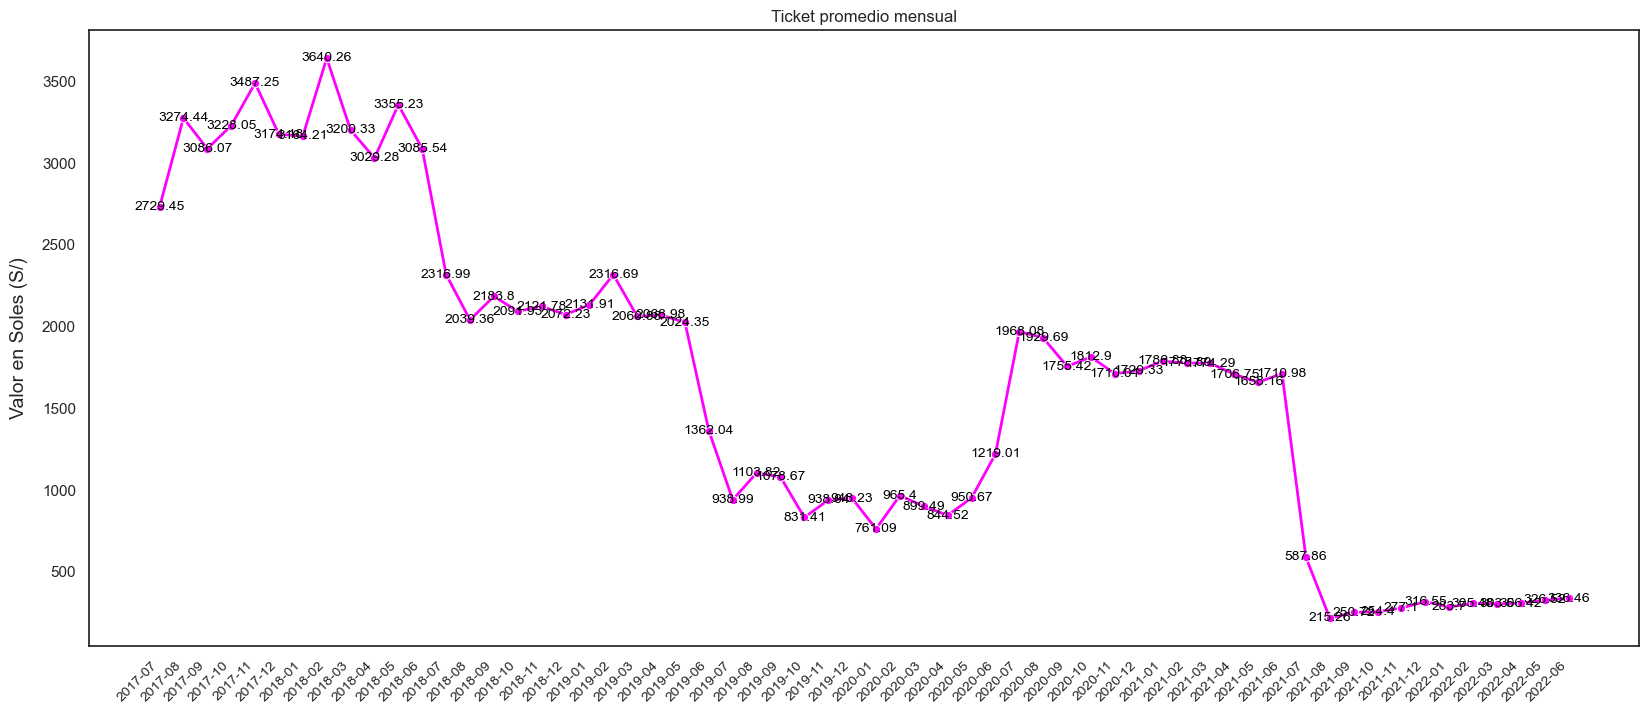

In [87]:
# Calcular el valor de ventas mensual
# ==============================================================================
ticket = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                      ['Ingreso_total'].sum()).reset_index()

# Calcular el número de clientes mensuales.
ticket2 = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                       ['Cod_Cliente'].count()).reset_index()

# Uniendo los dos marcos de datos creados
ticket_mensual =  pd.merge(ticket,
                          ticket2, on="Year_mes")

# Calcular el valor del ticket promedio mensual
for i in range(12):
    ticket_mensual['Ticket promedio mensual'] = (ticket['Ingreso_total'] 
                                            / ticket2['Cod_Cliente']).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
ticket_mensual['Year_mes'] = ticket_mensual['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))

ax = sns.lineplot(data=ticket_mensual,
                  x="Year_mes",
                  y="Ticket promedio mensual",
                  color="magenta",
                  linewidth=2,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor en Soles (S/)', fontsize=14, labelpad=10)
ax.set_title('Ticket promedio mensual')

# incluyendo etiquetas en puntos del gráfico
for x, y in zip(ticket_mensual['Year_mes'],
                ticket_mensual['Ticket promedio mensual']):
     ax.text(x, y, str(y), color="black", ha="center", va="center", fontsize=10)  
    
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()